# Beleg 2: Bilddateien, Bilddarstellung und Bilddiskretisierung

**Name:**Jonas Wonneberger
<br>
**Matrikelnr.:**s0582006

## Bearbeitungszeitraum
**Bearbeitungsbeginn:** Mi, 17.11.2022
<br>
**Abgabe (in der Übung zu zeigen bis spätestens):** Mi, 05.01.2023


**Hinweise zum Beleg:** 
- Die erfolgreiche Bearbeitung des Belegs ist zwingende Voraussetzung zur Teilnahme an der Klausur. 
- Sofern nicht anders angegeben können die Operationen mit einer Library Ihrer Wahl durchgeführt werden.


### Segmentierung von Mitosen im PHH3

In dieser Aufgabe werden Sie sich mit der Segmentierung von Mitosen auseinandersetzen. Mitosen sind Zellen, die sich gerade in Teilung befinden. Zwar ist dies ist ein natürlicher Prozess, jedoch findet er so selten statt, dass es statistisch unwahrscheinlich ist, eine Mitose in einem histologischen Schnitt zu finden. Innerhalb von Tumorgewebe jedoch ist die Proliferationsrate (sprich die Rate, mit der sich das Gewebe durch Zellteilung vermehrt) deutlich höher. Für diverse Tumorentitäten spielt die Erfassung dieser Proliferationsrate, etwa durch Auszählung von Mitosen, eine wesentliche Rolle in der Bewertung der Malignität.

### Viel Erfolg!

**Aufgabe 1.1**: Schauen Sie sich zunächst die Bilder im Ordner `mitosis_set` an. Hierbei handelt es sich um invasives Mammakarzinom, welches mit der IHC-Färbung für das Protein Phosphohistone-H3 (PHH3) gefärbt wurde. Der braune Ton der Mitosen entsteht durch Diaminobenzidine (DAB) welches an die entsprechenden Antikörper für das PHH3 gebunden ist. Die blaue Färbung der nicht-mitotischen Zellkerne entsteht durch Haematoxylin. 

Die Dateinamen der Bilder enthalten jeweils zwei Informationen: Zum einen die ID des Bilders (eine fortlaufende Nummer beginnend mit 01) sowie die Anzahl der jeweils im Bild enthaltenen Mitosen. Die Angaben sind durch einen Underscore (\_) getrennt. Lesen Sie nun alle Bilder ein. Überlegen Sie sich eine passende Datenstruktur zur Speicherung der jeweiligen Anzahl an Mitosen.

In [905]:
import os
from operator import itemgetter #to sort a dictionary in an array

def storage_info(folder):
    res = []
    files = os.listdir(folder)
    for i in range(0,len(files)):
        dictionarie_name = files[i]
        id = dictionarie_name.split("_")
        mitoses_count = id[2].split(".png")
        dictionarie_name = {"data_name" : dictionarie_name, "ID" : id[1], "mitoses_count": mitoses_count[0]}
        res.append(dictionarie_name)
        res = sorted(res, key=itemgetter('ID'))
    return res


**Aufgabe 1.2**: Entwickeln Sie ein Verfahren zur Segmentierung der Mitosen. Als Teilschritte sollen sowohl die Segmentierungsmasken als auch die im Originalbild hevorgehobenen Mitosen (entweder, indem das Bild anhand der Maske zugeschnitten oder indem die Mitosen mit einem Polygon markiert wurden) ausgegeben werden. Am Ende soll für jedes Bild die Anzahl an gefundenen Mitosen ausgegeben werden. Beginnen Sie erst mit Aufgabe 1.3, wenn ihr Algorithmus für jedes Bild die korrekte Anzahl an Mitosen findet. 

In [906]:
#1.2
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox

def count_mitoses(filename):
    img = cv2.imread(filename)
    hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    bound_lower = np.array([10, 65, 70])
    bound_upper = np.array([50, 255, 255])

    mask_green = cv2.inRange(hsv_img, bound_lower, bound_upper)
    kernel = np.ones((7,7),np.uint8)

    mask_green = cv2.morphologyEx(mask_green, cv2.MORPH_CLOSE, kernel)
    mask_green = cv2.morphologyEx(mask_green, cv2.MORPH_OPEN, kernel)

    seg_img = cv2.bitwise_and(img, img, mask=mask_green)
    contours, hier = cv2.findContours(mask_green.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    output = cv2.drawContours(seg_img, contours, -1, (0,0,255), 3)
    objects = str(len(contours))

    img = seg_img

    box, label, count = cv.detect_common_objects(img,  confidence=0.25, model='yolov3')
    output = draw_bbox(img, box, label, count)
    output = cv2.cvtColor(output,cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10,10))
    plt.axis('off')
    plt.imshow(output)
    plt.show()
    print("Found " + objects + " mitoses with cv2 findContours")
    print("Found " + str(len(label)) + " mitoses with cvLib Object_detection")
    mitoses_cvLib = int(objects)
    mitoses_cv2 = int(str(len(label)))
    return mitoses_cvLib, mitoses_cv2


**Aufgabe 1.3**: Lesen Sie nun die Dateien aus dem Ordner `mitosis_test_set` ein, indem Sie erneut ihre zuvor definierte Datenstruktur verwenden. Wenden Sie ihr Verfahren einmalig auf diese Daten an (einmalig in dem Sinne, dass keine weitere Optimierung des Algorithmus durchgeführt wird) und geben Sie für jedes Bild aus, wieviele Mitosen ihre Implementierung gefunden hat und wieviele laut Dateinamen zu finden gewesen wären. Schließlich geben Sie noch die Genaugikeit ihrer Lösung für diesen Datensatz an, in dem Sie die Gesamtzahl der gefundenen Mitosen durch die Gesamtzahl der tatsächlichen Mitosen teilen.

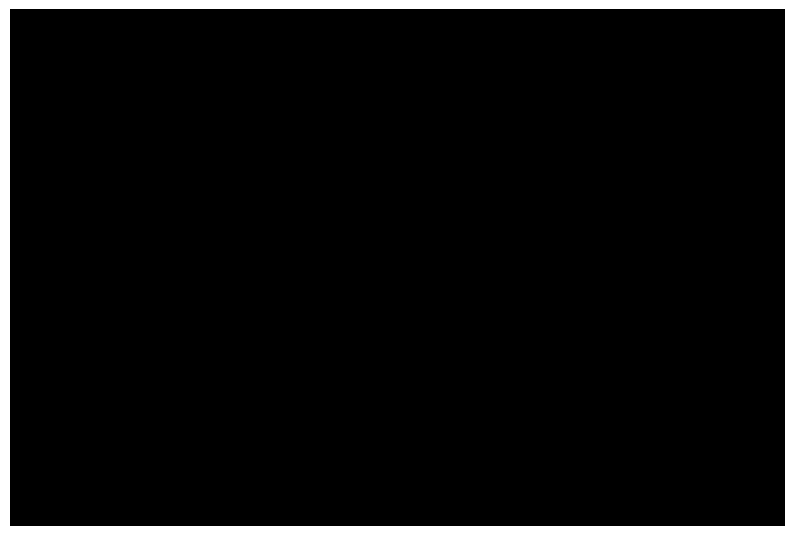

Found 0 mitoses with cv2 findContours
Found 0 mitoses with cvLib Object_detection
ID 01 should have 0 mitoses


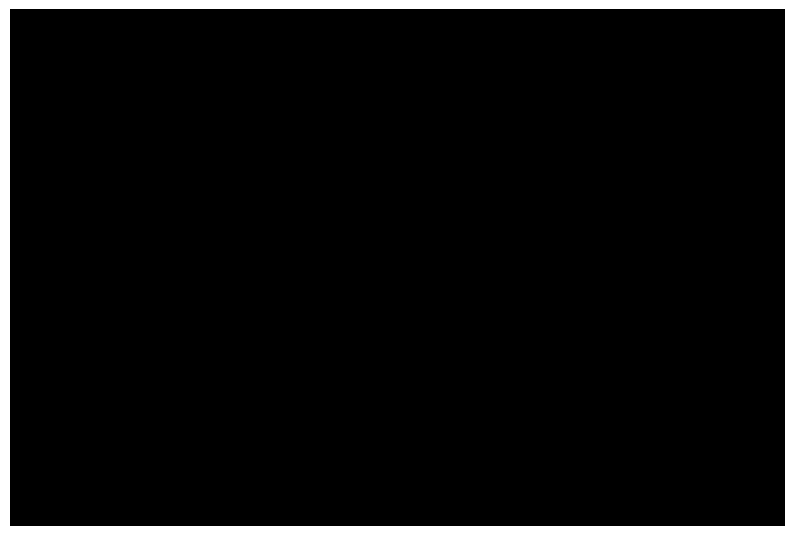

Found 0 mitoses with cv2 findContours
Found 0 mitoses with cvLib Object_detection
ID 02 should have 0 mitoses


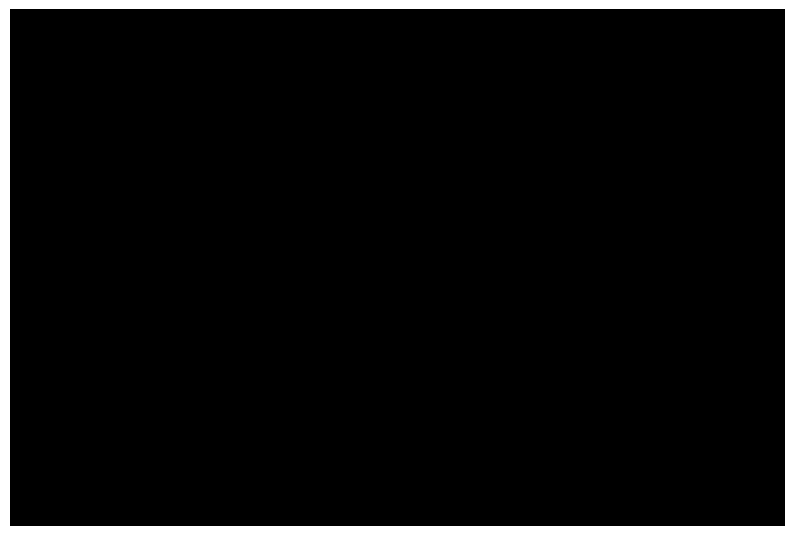

Found 0 mitoses with cv2 findContours
Found 0 mitoses with cvLib Object_detection
ID 03 should have 0 mitoses


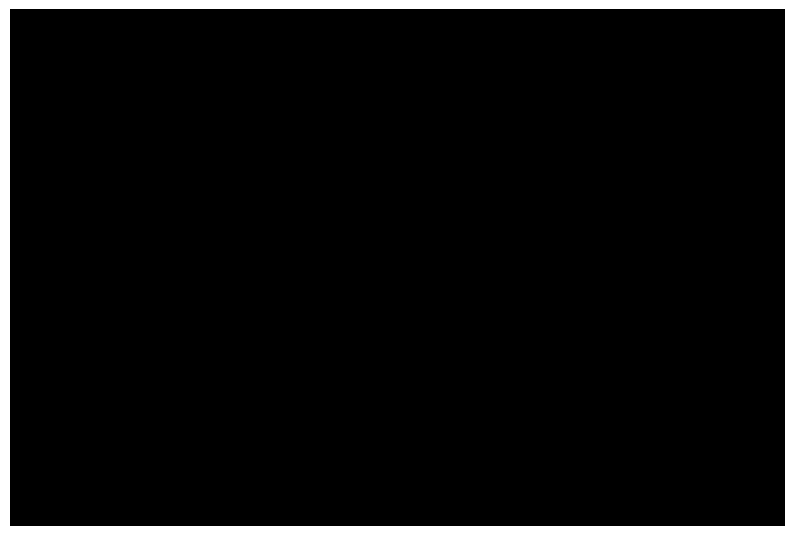

Found 0 mitoses with cv2 findContours
Found 0 mitoses with cvLib Object_detection
ID 04 should have 0 mitoses


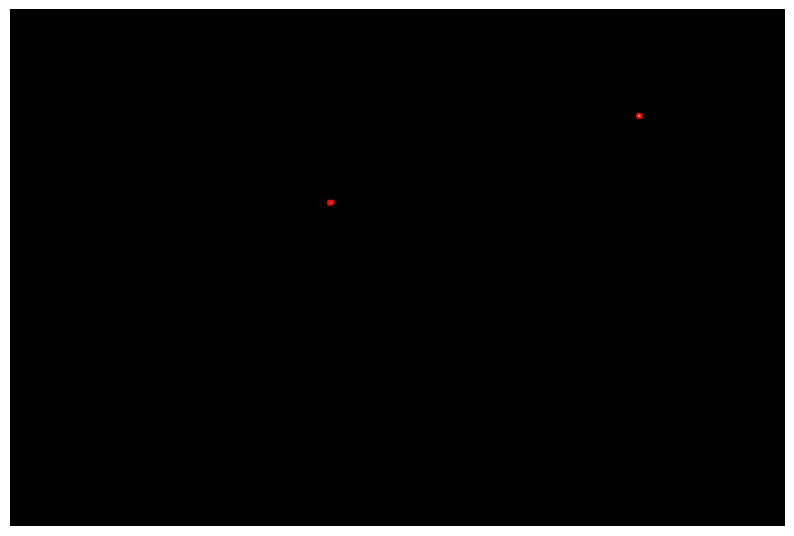

Found 2 mitoses with cv2 findContours
Found 0 mitoses with cvLib Object_detection
ID 05 should have 0 mitoses


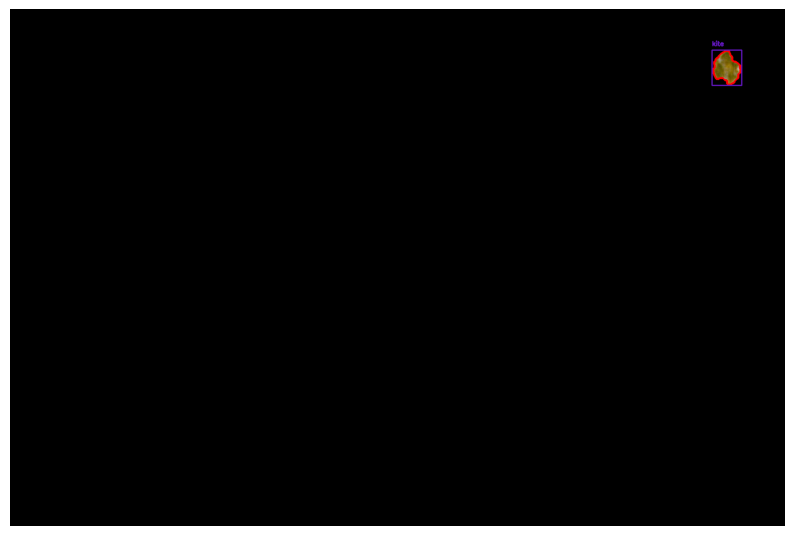

Found 1 mitoses with cv2 findContours
Found 1 mitoses with cvLib Object_detection
ID 06 should have 1 mitoses


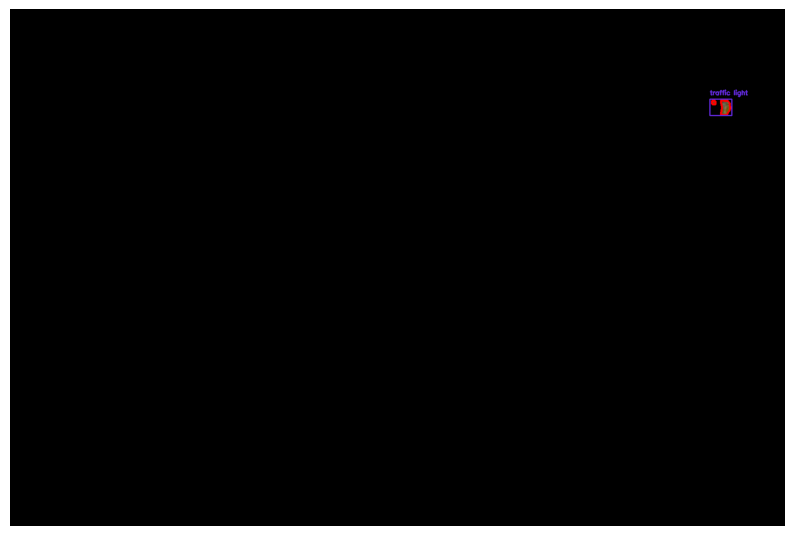

Found 2 mitoses with cv2 findContours
Found 1 mitoses with cvLib Object_detection
ID 07 should have 1 mitoses


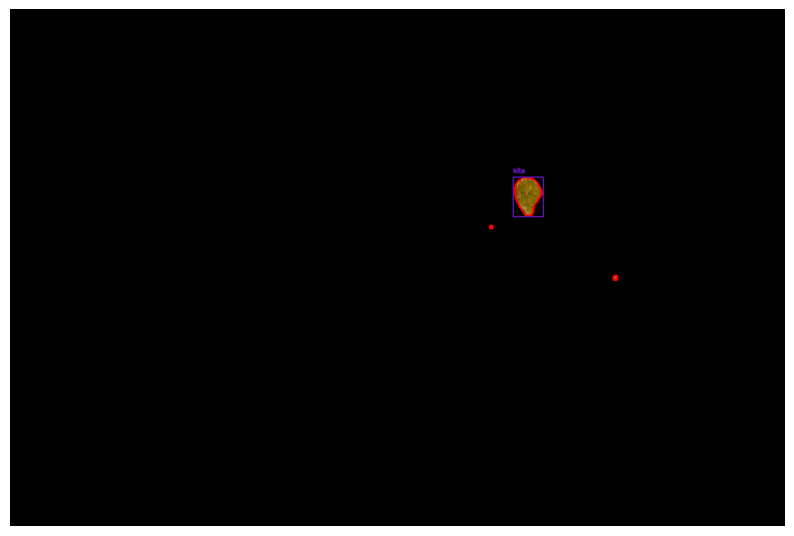

Found 3 mitoses with cv2 findContours
Found 1 mitoses with cvLib Object_detection
ID 08 should have 1 mitoses


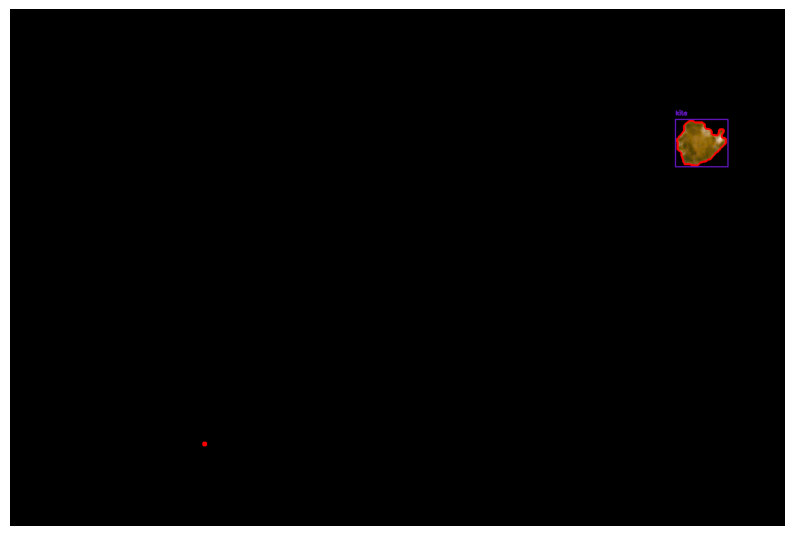

Found 2 mitoses with cv2 findContours
Found 1 mitoses with cvLib Object_detection
ID 09 should have 1 mitoses


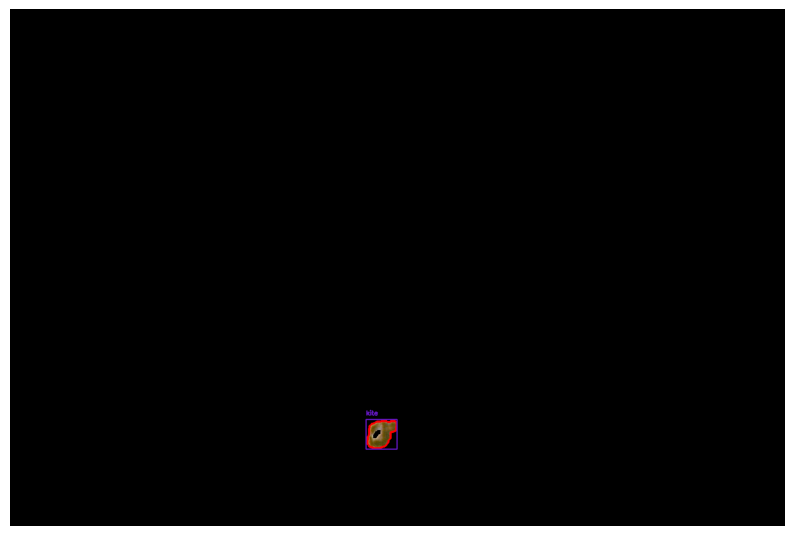

Found 1 mitoses with cv2 findContours
Found 1 mitoses with cvLib Object_detection
ID 10 should have 1 mitoses


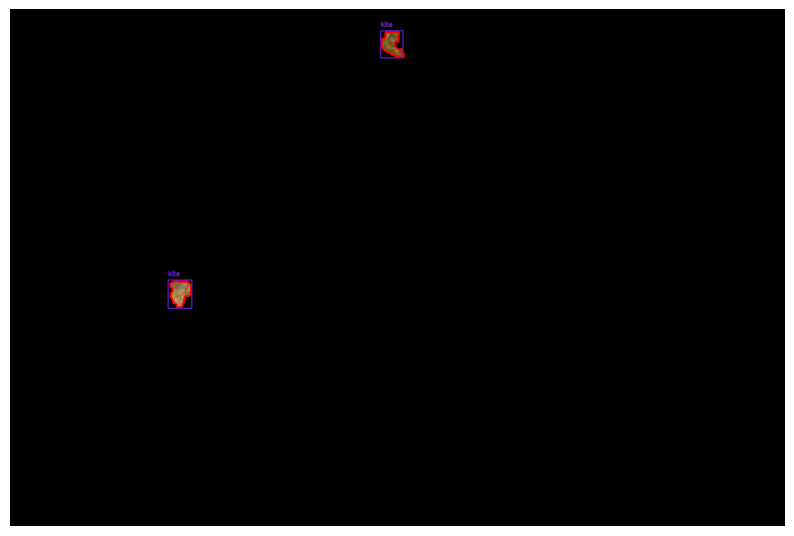

Found 2 mitoses with cv2 findContours
Found 2 mitoses with cvLib Object_detection
ID 11 should have 2 mitoses


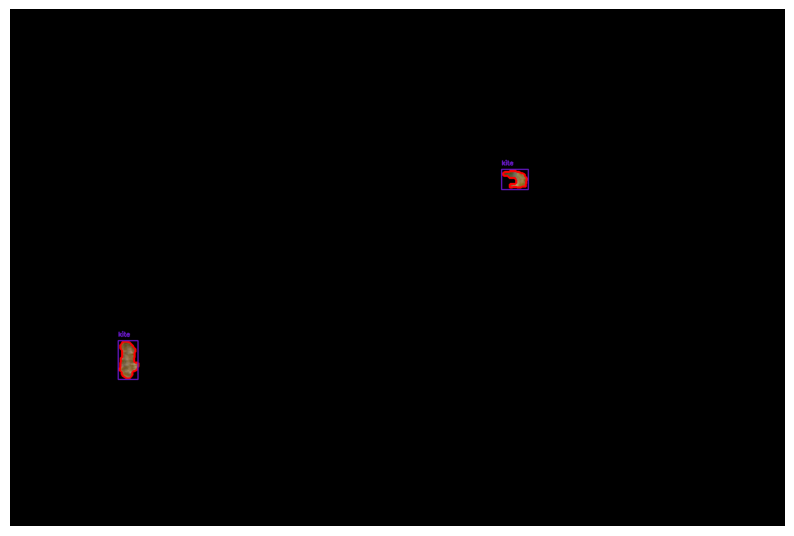

Found 2 mitoses with cv2 findContours
Found 2 mitoses with cvLib Object_detection
ID 12 should have 2 mitoses


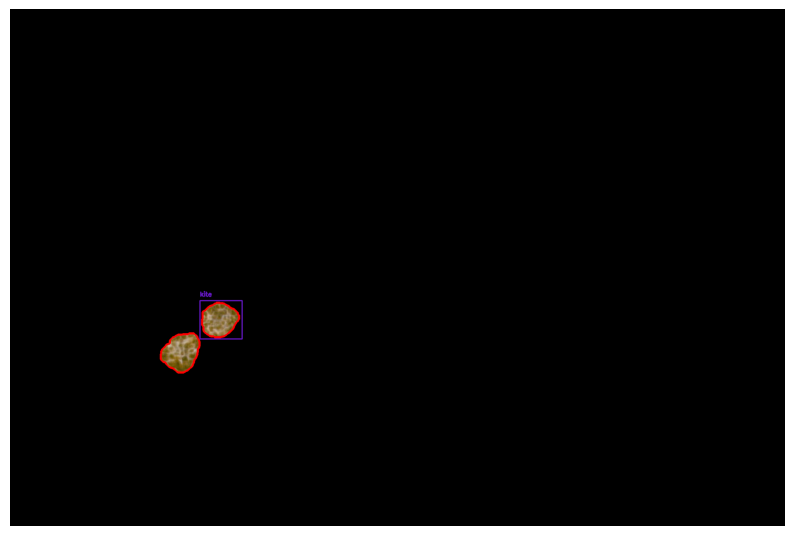

Found 2 mitoses with cv2 findContours
Found 1 mitoses with cvLib Object_detection
ID 13 should have 2 mitoses


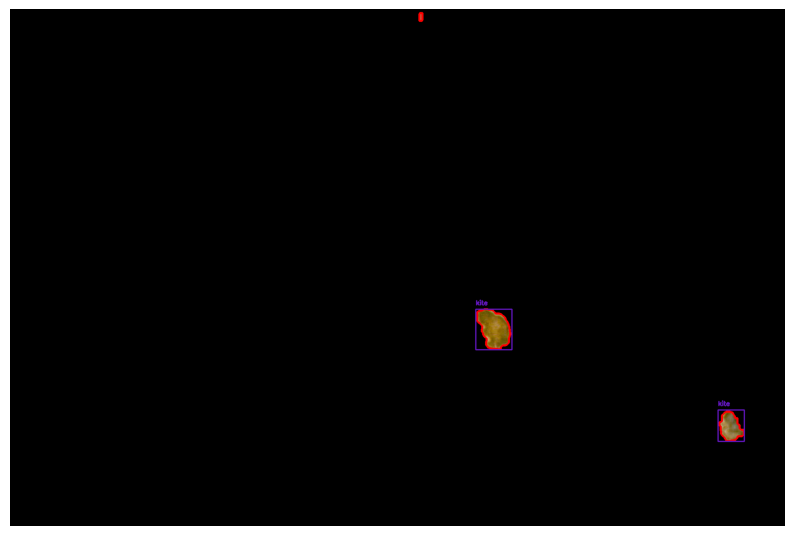

Found 3 mitoses with cv2 findContours
Found 2 mitoses with cvLib Object_detection
ID 14 should have 2 mitoses


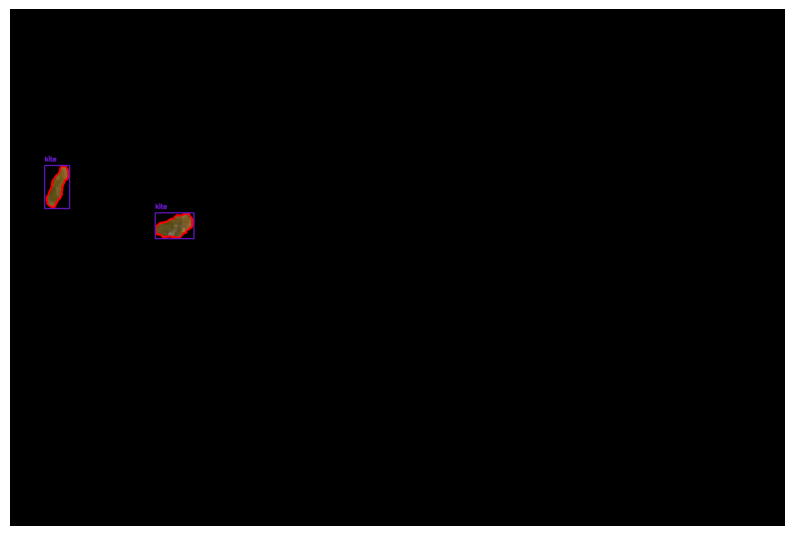

Found 2 mitoses with cv2 findContours
Found 2 mitoses with cvLib Object_detection
ID 15 should have 2 mitoses


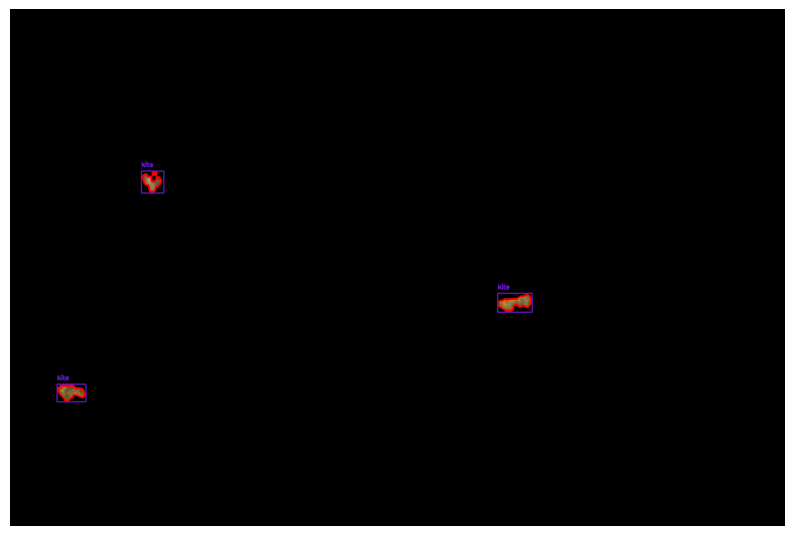

Found 4 mitoses with cv2 findContours
Found 3 mitoses with cvLib Object_detection
ID 16 should have 3 mitoses


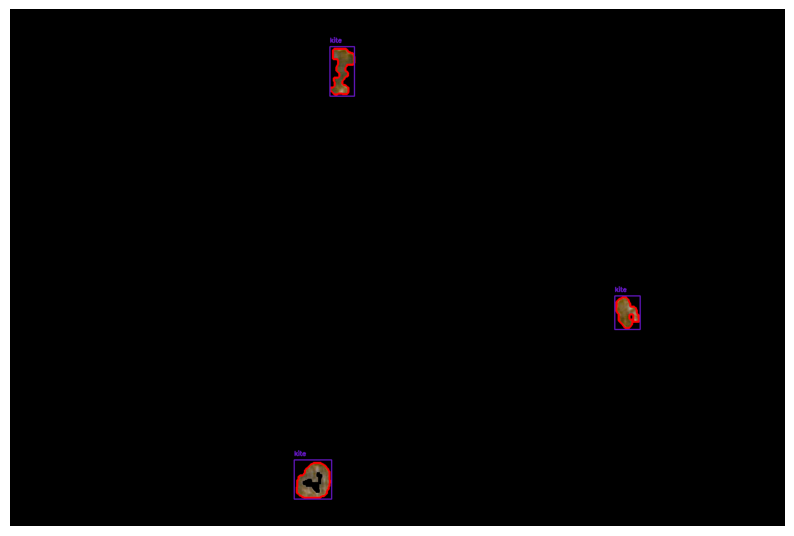

Found 3 mitoses with cv2 findContours
Found 3 mitoses with cvLib Object_detection
ID 17 should have 3 mitoses


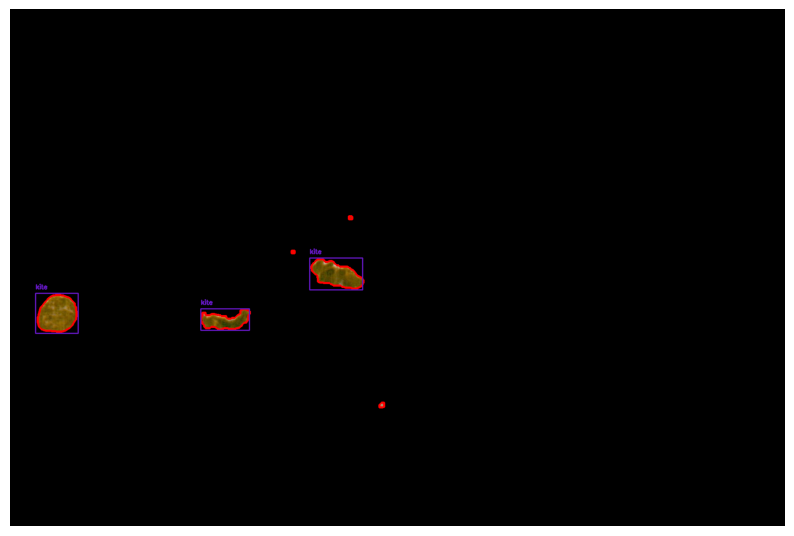

Found 6 mitoses with cv2 findContours
Found 3 mitoses with cvLib Object_detection
ID 18 should have 3 mitoses


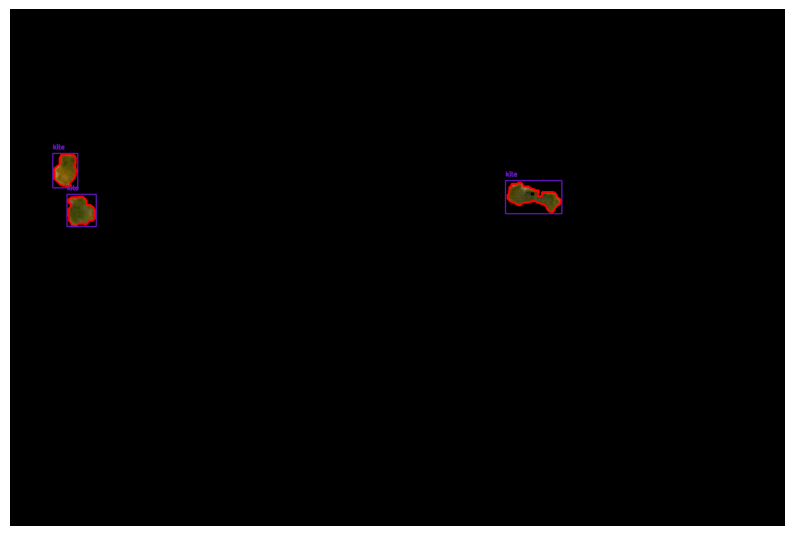

Found 3 mitoses with cv2 findContours
Found 3 mitoses with cvLib Object_detection
ID 19 should have 3 mitoses


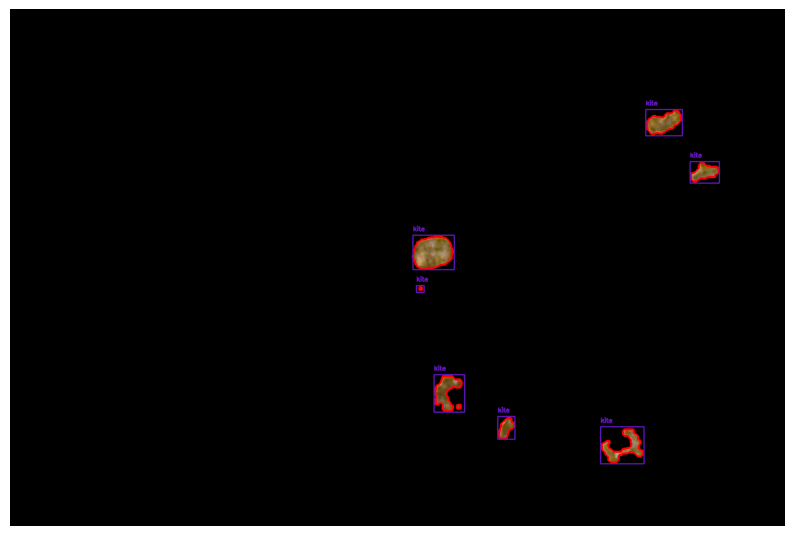

Found 8 mitoses with cv2 findContours
Found 7 mitoses with cvLib Object_detection
ID 20 should have 6 mitoses


In [907]:
#1.3
res1 = storage_info('mitosis_test_set')
mitoses_expects = 0
mitoses_cvLib_res = 0
mitoses_cv2_res = 0
for i in range(0,len(res1)):
    var = "mitosis_test_set/" + res1[i]["data_name"] + ""
    mitoses_cvLib, mitoses_cv2 = count_mitoses(var)
    print("ID " + res1[i]['ID'] + " should have " + res1[i]['mitoses_count'] + " mitoses")
    mitoses_cvLib_res += mitoses_cvLib
    mitoses_cv2_res += mitoses_cv2
    mitoses_expects = int(mitoses_expects) + int(res1[i]['mitoses_count'])

In [908]:
print("precision cv2 findContours: ")
print(mitoses_expects/mitoses_cvLib_res)
print("precision cvLib Object_detection: ")
print(mitoses_expects/mitoses_cv2_res)

precision cv2 findContours: 
0.717391304347826
precision cvLib Object_detection: 
1.0
